### <center> Тема “Обучение с учителем в Scikit-learn”

<font color='blue'>
    
**Задание 1**
    
- Импортируйте библиотеки pandas и numpy.
- Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
- Создайте датафреймы X и y из этих данных.
- Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью
функции **train_test_split** так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент **random_state** должен быть равен 42.
- Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля
sklearn.linear_model.
- Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на
тестовых.
- Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [8]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [9]:
from sklearn.datasets import load_boston

In [177]:
data = load_boston()
df = boston['data']
feature_names = boston['feature_names']
X = pd.DataFrame(df, columns=data['feature_names'])
y = pd.DataFrame(boston['target'], columns=['price'])
X.head(3) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [18]:
y.head(3)

,price
0,24.0
1,21.6
2,34.7


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [24]:
LR = LinearRegression()

In [26]:
LR.fit(x_train, y_train)

LinearRegression()

In [72]:
y_pred = LR.predict(x_test)
y_pred.shape

(152, 1)

In [114]:
from sklearn.metrics import r2_score
print(f'Среднеквадратичное отклонение для ЛИНЕЙНОЙ РЕГРЕССИИ составило {round(r2_score(y_pred, y_test),3)}')

Среднеквадратичное отклонение для ЛИНЕЙНОЙ РЕГРЕССИИ составило 0.669


<font color='blue'>
    
**Задание 2**
    
- Создайте модель под названием **model** с помощью **RandomForestRegresso**r из модуля sklearn.ensemble.
- Сделайте агрумент **n_estimators** равным 1000, **max_depth** должен быть равен 12 и **random_state** сделайте равным 42.
- Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма ***y_train*** поставьте ***y_train.values[:, 0]***, чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
- Сделайте предсказание на тестовых данных и посчитайте R2. 
- Сравните с результатом из предыдущего задания.
- Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [108]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [109]:
model.fit(x_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [111]:
y_pred_RF = model.predict(x_test)

In [118]:
r2_RF = r2_score(y_pred_RF, y_test)
print(f'Среднеквадратичное отклонение для RandomForestRegressor составило {round((r2_RF),3)}')
print(f'Среднеквадратичное отклонение для ЛИНЕЙНОЙ РЕГРЕССИИ составило {round(r2_score(y_pred, y_test),3)}')

Среднеквадратичное отклонение для RandomForestRegressor составило 0.848
Среднеквадратичное отклонение для ЛИНЕЙНОЙ РЕГРЕССИИ составило 0.669


<font color='green'>ОТВЕТ: лучше модель с высоким R2. Модель RandomForestRegressor дала более точные предсказания.

<font color='blue'>
    
***Задание 3** 
- Вызовите документацию для класса RandomForestRegressor,
- найдите информацию об атрибуте feature_importances_.
- С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.>

In [119]:
?RandomForestRegressor

<font color='green'>feature_importances_ : ndarray of shape (n_features,)
    The impurity-based feature importances.
    The higher, the more important the feature.
    The importance of a feature is computed as the (normalized)
    total reduction of the criterion brought by that feature.  It is also
    known as the Gini importance. <br>
    
    Warning: impurity-based feature importances can be misleading for
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.

In [167]:
print('======Атрибут feature_importances_:==========')
print(model.feature_importances_)
print('====Сумма показателей для всех признаков должна быть равна "1" ===:')
print(model.feature_importances_.sum())

======Атрибут feature_importances_:==========
[0.03167574 0.00154252 0.00713813 0.00123624 0.01426897 0.40268179
 0.01429864 0.06397257 0.00528122 0.01152493 0.01808108 0.01245085
 0.41584732]
====Сумма показателей для всех признаков должна быть равна "1" ===:
1.0


In [173]:
fi = model.feature_importances_

In [124]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [168]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 6, 4
%matplotlib inline

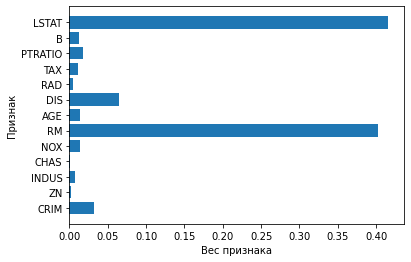

In [178]:
plt.barh(feature_names, model.feature_importances_)
plt.xlabel("Вес признака")
plt.ylabel("Признак")
plt.show()

<font color=green>
ОТВЕТ:     <br>
Наиболее весомые коэффициенты 0.40268179 и 0.41584732 соответствуют признакам:<br>
- RM       average number of rooms per dwelling<br>
- LSTAT    % lower status of the population

<font color='blue'>
    
***Задание 4**
    
В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection. Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими. Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать
лучшую модель. Мы будем вычислять AUC, то есть площадь под кривой ROC. <br>
- Импортируйте из соответствующих модулей ***RandomForestClassifier***, ***GridSearchCV*** и ***train_test_split***.<br>
- Загрузите датасет ***creditcard.csv*** и создайте датафрейм ***df***.<br>
- С помощью метода ***value_counts*** с аргументом ***normalize=True*** убедитесь в том, что выборка несбалансирована. <br>
- Используя метод ***info***, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.
    Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:        ***pd.options.display.max_columns = 100***.
- Просмотрите первые 10 строк датафрейма df.
- Создайте датафрейм ***X*** из датафрейма df, исключив столбец ***Class***.
- Создайте объект Series под названием **y** из столбца ***Class***.
- Разбейте ***X*** и ***y*** на тренировочный и тестовый наборы данных при помощи функции ***train_test_split***, используя аргументы: ***test_size=0.3***, ***random_state=100***, ***stratify=y***. У вас должны получиться объекты ***X_train, X_test, y_train и y_test***.
- Просмотрите информацию о их форме.
- Для поиска по сетке параметров задайте такие параметры: <br>
    ***parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]***
- Создайте модель ***GridSearchCV*** со следующими аргументами:
    ***estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3***.
- Обучите модель на тренировочном наборе данных (может занять несколько минут).
- Просмотрите параметры лучшей модели с помощью атрибута best_params_.
- Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
- Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. 
- Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
 Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.
    
    

In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
credit_card_df = pd.read_csv('creditcard.csv')

In [198]:
balance = credit_card_df.value_counts(normalize=True)

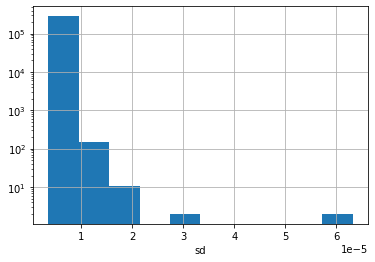

In [199]:
balance.hist(log=True)
plt.xlabel('sd')
plt.show()

In [211]:
pd.options.display.max_columns = 100
credit_card_df.info()

In [212]:
credit_card_df.head(10)

In [213]:
X = credit_card_df.drop(['Class'], axis=1)

In [216]:
#Создайте объект Series под названием y из столбца Class
y = credit_card_df['Class']
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [217]:
# Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split,
# используя аргументы: test_size=0.3, random_state=100, stratify=y. 
# У вас должны получиться объекты X_train, X_test, y_train и y_test.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100, stratify=y)

In [220]:
# Просмотрим информацию о их форме.
print('X_train', X_train.shape )
print('y_train', y_train.shape )
print('X_test', X_test.shape )
print('y_test', y_test.shape )

X_train (199364, 30)
y_train (199364,)
X_test (85443, 30)
y_test (85443,)


In [221]:
# Для поиска по сетке параметров задайте такие параметры:
# parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]

In [228]:
# Создайте модель GridSearchCV со следующими аргументами: 
# estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3.
Grid_model = GridSearchCV(estimator=RandomForestClassifier(random_state=100), \
                          param_grid=parameters, scoring='roc_auc', cv=3)
Grid_model

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [229]:
Grid_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [232]:
# Просмотрим параметры лучшей модели с помощью атрибута best_params_.

print(Grid_model.best_params_)

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}


In [266]:
# Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
# Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1)
# и запишите в массив y_pred_proba. 

y_valid_prob = Grid_model.predict_proba(X_test )
y_pred_proba = y_valid_prob[:,1]
y_pred_proba

array([0.00092917, 0.00029521, 0.00028215, ..., 0.00028215, 0.0006822 ,
       0.01246098])

In [272]:
# Из модуля sklearn.metrics импортируйте метрику roc_auc_score. 
# Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных,
# используя в качестве аргументов массивы y_test и y_pred_proba.

from sklearn.metrics import roc_auc_score

RAS = roc_auc_score(y_test, y_pred_proba)
RAS

0.9462664156037156

<font color='blue'>
    
****Дополнительные задания:***
    
1). Загрузите датасет ***Wine*** из встроенных датасетов ***sklearn.datasets*** с помощью функции ***load_wine*** в
переменную ***data***.<br>
2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи
аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список ***data_keys***,
содержащий ее ключи.<br>
3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде
привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими
переносами и т.д. <br>
    4). Сколько классов содержит целевая переменная датасета? Выведите названия классов.<br>
5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков
создайте датафрейм под названием ***X***.<br>
6). Выясните размер датафрейма ***X*** и установите, имеются ли в нем пропущенные значения.<br>
7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64.
Название поля - ***'target'***.<br>
8). Постройте матрицу корреляций для всех полей ***X***. Дайте полученному датафрейму название
X_corr.<br>
9). Создайте список ***igh_corr*** из признаков, корреляция которых с полем ***target*** по абсолютному
значению превышает 0.5 (причем, само поле target не должно входить в этот список).<br>
10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых
содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X
соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака.
Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с
признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с
помощью метода describe.<br>

In [1]:
from sklearn.datasets import load_wine

In [2]:
# 1)
data_wine = load_wine()


In [26]:
# 2)
data_keys = data_wine.keys()
data_keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
# 3)
print(data_wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [29]:
# 4). Сколько классов содержит целевая переменная датасета? Выведите названия классов.<br>
wine_target = pd.DataFrame(data_wine['target'])
wine_target.value_counts()

1    71
0    59
2    48
dtype: int64

<font color=green>
ОТВЕТ:
три класса

In [15]:
# 5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков
# создайте датафрейм под названием X.
X = pd.DataFrame(data_wine['data'], columns=data_wine['feature_names'])
X.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [19]:
# 6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.
print('Размер датафрейма X', X.shape)
X.info()

Размер датафрейма X (178, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 

In [23]:
# количество нулевых ячеек
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [74]:
# 7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64.  Название поля - 'target'
X['target'] = data_wine['target'].astype(np.int64)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   alcohol                         178 non-null    float64
 1   malic_acid                      178 non-null    float64
 2   ash                             178 non-null    float64
 3   alcalinity_of_ash               178 non-null    float64
 4   magnesium                       178 non-null    float64
 5   total_phenols                   178 non-null    float64
 6   flavanoids                      178 non-null    float64
 7   nonflavanoid_phenols            178 non-null    float64
 8   proanthocyanins                 178 non-null    float64
 9   color_intensity                 178 non-null    float64
 10  hue                             178 non-null    float64
 11  od280/od315_of_diluted_wines    178 non-null    float64
 12  proline                         178 

In [44]:
# 8). Постройте матрицу корреляций для всех полей ***X***. Дайте полученному датафрейму название X_corr.
X_corr = X.corr()
X_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, alcohol to target
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       14 non-null     float64
 1   malic_acid                    14 non-null     float64
 2   ash                           14 non-null     float64
 3   alcalinity_of_ash             14 non-null     float64
 4   magnesium                     14 non-null     float64
 5   total_phenols                 14 non-null     float64
 6   flavanoids                    14 non-null     float64
 7   nonflavanoid_phenols          14 non-null     float64
 8   proanthocyanins               14 non-null     float64
 9   color_intensity               14 non-null     float64
 10  hue                           14 non-null     float64
 11  od280/od315_of_diluted_wines  14 non-null     float64
 12  proline                       14 non-null     float64
 13  ta

In [59]:
# 9). Создайте список igh_corr из признаков, корреляция которых с полем target по абсолютному
# значению превышает 0.5 (причем, само поле target не должно входить в этот список).
high_corr = X_corr['target']
high_corr = high_corr[np.abs(X_corr['target']) > 0.5].drop('target',axis=0)
high_corr = list(high_corr.index)
high_corr

['alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [72]:
# 10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке 
# high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного
# к первоначальному названию признака. 
# Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из 
# списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.

X = X.drop('target', axis=1)
for i in high_corr:
    X[i+'_2'] = X[i]**2
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,243.36,7.8400,9.3636,1.0816,15.3664,1134225.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,125.44,7.0225,7.6176,1.1025,11.5600,1102500.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,345.96,7.8400,10.4976,1.0609,10.0489,1404225.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,282.24,14.8225,12.1801,0.7396,11.9025,2190400.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,441.00,7.8400,7.2361,1.0816,8.5849,540225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,420.25,2.8224,0.3721,0.4096,3.0276,547600.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,529.00,3.2400,0.5625,0.4900,2.4336,562500.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,400.00,2.5281,0.4761,0.3481,2.4336,697225.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,400.00,2.7225,0.4624,0.3600,2.6244,705600.0


## End of task